<div dir="rtl">

# 📊 گزارش کلی

---

##  ۱. تجزیه تصویر به فضاهای رنگی مختلف (RGB، RYB، CMYK)

- تابع `convert_rgb_to_ryb`

  این تابع تصویر RGB را به فضای رنگی RYB تبدیل می‌کند که بیشتر در هنر و ترکیب رنگ‌ها استفاده می‌شود.

- تابع `convert_rgb_to_cmyk`

  این تابع تصویر RGB را به فضای رنگی CMYK تبدیل می‌کند که بیشتر در چاپ مورد استفاده قرار می‌گیرد.

- تابع `decompose_image`

  این تابع:
   تصویر را به فضاهای RGB، RYB و CMYK تجزیه می‌کند.

   برای هر کانال تصویر جداگانه‌ای ذخیره می‌شود.

- تابع `show_components`

  این تابع با استفاده از کتابخانه matplotlib تمام کانال‌های تصویر را در یک نمودار ۳×۴ به شکل تصویری نمایش می‌دهد. این شامل:
- تصویر اصلی
- کانال‌های RGB
- کانال‌های RYB
- کانال‌های CMYK


</div>


Image decomposition completed and results saved.


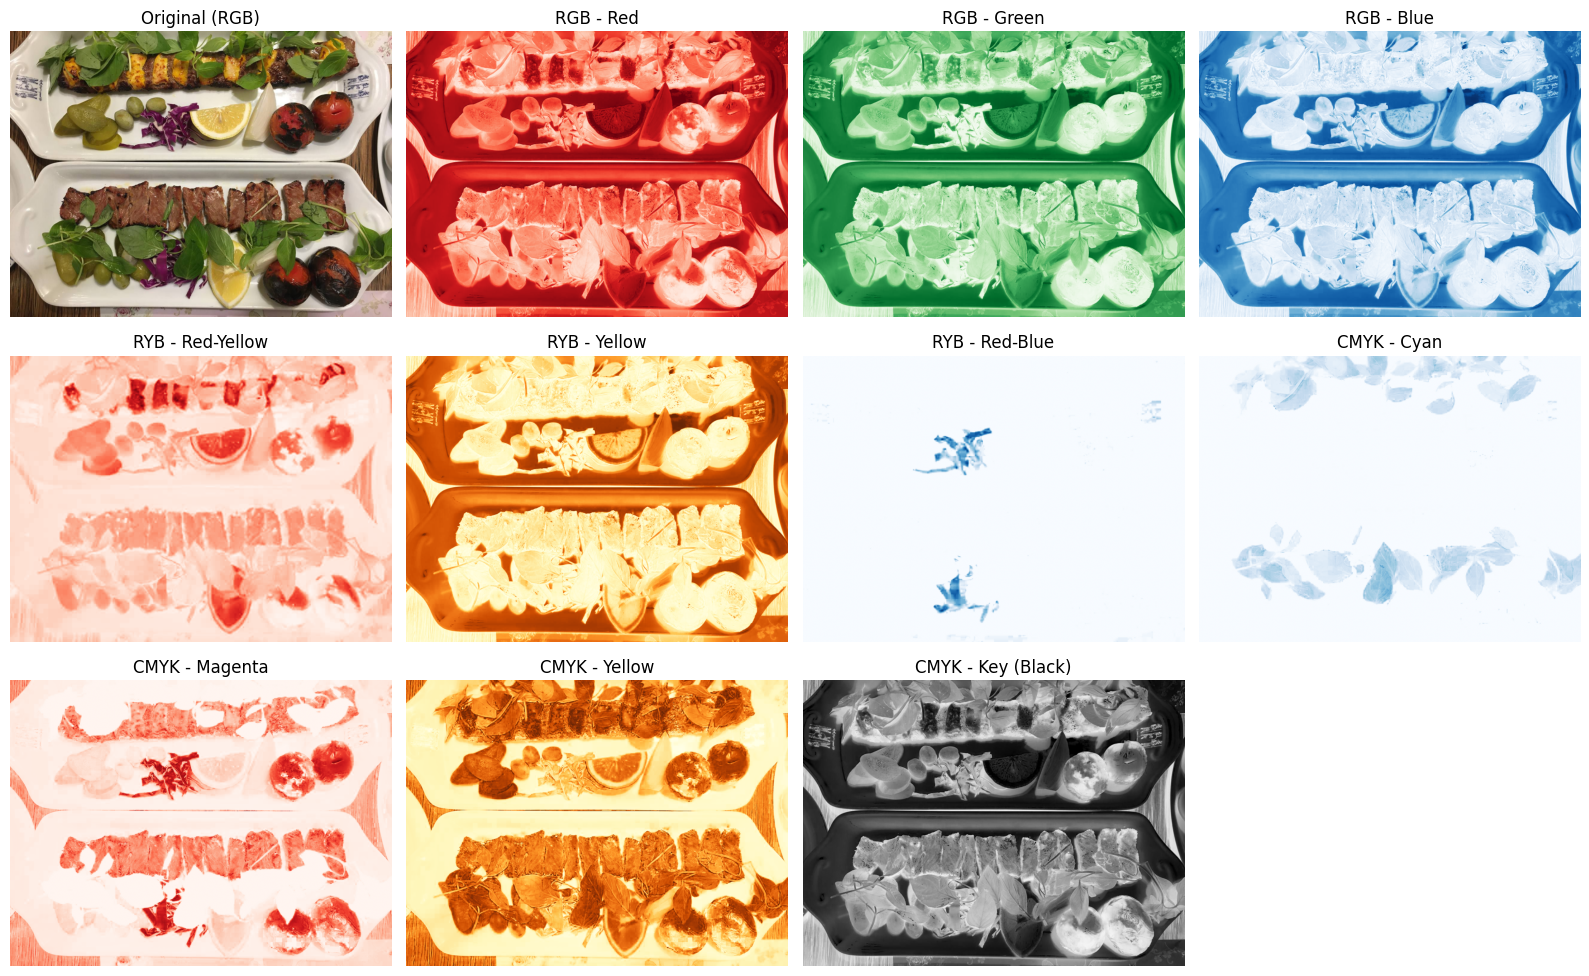

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


def convert_rgb_to_ryb(rgb_img):
    r, g, b = cv2.split(rgb_img)

    # Calculate RYB channels
    ry = r.astype(np.float32) - np.minimum(g, b).astype(np.float32)  # Remove green/blue from red
    y = (g.astype(np.float32) + b.astype(np.float32) - np.abs(g.astype(np.float32) - b.astype(np.float32))) / 2  # Yellow component
    rb = b.astype(np.float32) - np.minimum(r, g).astype(np.float32)  # Remove red/green from blue

    # Normalize to 0-255 range
    ry = np.clip(ry, 0, 255).astype(np.uint8)
    y = np.clip(y, 0, 255).astype(np.uint8)
    rb = np.clip(rb, 0, 255).astype(np.uint8)

    return cv2.merge((ry, y, rb))

def convert_rgb_to_cmyk(rgb_img):
    # Convert RGB to CMYK (normalized to 0-1 first)
    rgb = rgb_img.astype(np.float32) / 255.0

    # Calculate K (black) channel
    k = 1 - np.max(rgb, axis=2)

    # Calculate CMY channels
    c = (1 - rgb[..., 0] - k) / (1 - k + 1e-5)
    m = (1 - rgb[..., 1] - k) / (1 - k + 1e-5)
    y = (1 - rgb[..., 2] - k) / (1 - k + 1e-5)

    # Scale back to 0-255 range
    c = np.clip(c * 255, 0, 255).astype(np.uint8)
    m = np.clip(m * 255, 0, 255).astype(np.uint8)
    y = np.clip(y * 255, 0, 255).astype(np.uint8)
    k = np.clip(k * 255, 0, 255).astype(np.uint8)

    return cv2.merge((c, m, y, k))

def decompose_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error reading image from the path.")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #RGB
    r, g, b = cv2.split(img_rgb)

    cv2.imwrite('RGB_Red.jpg', r)
    cv2.imwrite('RGB_Green.jpg', g)
    cv2.imwrite('RGB_Blue.jpg', b)

    #RYB
    ryb = convert_rgb_to_ryb(img_rgb)
    ry, y, rb = cv2.split(ryb)
    cv2.imwrite('RYB_Red.jpg', ry)
    cv2.imwrite('RYB_Yellow.jpg', y)
    cv2.imwrite('RYB_Blue.jpg', rb)

    #CMYK
    cmyk = convert_rgb_to_cmyk(img_rgb)
    c, m, y_k, k = cv2.split(cmyk)
    cv2.imwrite('color_components/CMYK_Cyan.jpg', c)
    cv2.imwrite('color_components/CMYK_Magenta.jpg', m)
    cv2.imwrite('color_components/CMYK_Yellow.jpg', y_k)
    cv2.imwrite('color_components/CMYK_Key.jpg', k)

    print("Image decomposition completed and results saved.")

def show_components(img_rgb):
    plt.figure(figsize=(16, 10))

    #Original Image
    plt.subplot(3, 4, 1)
    plt.imshow(img_rgb)
    plt.title('Original (RGB)')
    plt.axis('off')

    #RGB Components
    r, g, b = cv2.split(img_rgb)

    plt.subplot(3, 4, 2)
    plt.imshow(r, cmap='Reds')
    plt.title('RGB - Red')
    plt.axis('off')

    plt.subplot(3, 4, 3)
    plt.imshow(g, cmap='Greens')
    plt.title('RGB - Green')
    plt.axis('off')

    plt.subplot(3, 4, 4)
    plt.imshow(b, cmap='Blues')
    plt.title('RGB - Blue')
    plt.axis('off')

    #RYB Components
    ryb = convert_rgb_to_ryb(img_rgb)
    ry, y, rb = cv2.split(ryb)

    plt.subplot(3, 4, 5)
    plt.imshow(ry, cmap='Reds')
    plt.title('RYB - Red-Yellow')
    plt.axis('off')

    plt.subplot(3, 4, 6)
    plt.imshow(y, cmap='YlOrBr')
    plt.title('RYB - Yellow')
    plt.axis('off')

    plt.subplot(3, 4, 7)
    plt.imshow(rb, cmap='Blues')
    plt.title('RYB - Red-Blue')
    plt.axis('off')

    #CMYK Components
    cmyk = convert_rgb_to_cmyk(img_rgb)
    c, m, y_k, k = cv2.split(cmyk)

    plt.subplot(3, 4, 8)
    plt.imshow(c, cmap='Blues')
    plt.title('CMYK - Cyan')
    plt.axis('off')

    plt.subplot(3, 4, 9)
    plt.imshow(m, cmap='Reds')
    plt.title('CMYK - Magenta')
    plt.axis('off')

    plt.subplot(3, 4, 10)
    plt.imshow(y_k, cmap='YlOrBr')
    plt.title('CMYK - Yellow')
    plt.axis('off')

    plt.subplot(3, 4, 11)
    plt.imshow(k, cmap='gray')
    plt.title('CMYK - Key (Black)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

decompose_image('/content/1008219287_57058009.jpg')

img = cv2.imread('/content/1008219287_57058009.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_components(img_rgb)

<div dir="rtl">

## ۲. تبدیل تصویر به مقیاس خاکستری (Grayscale)

- تابع `convert_to_gray_scale`

 تصویر اصلی را از مسیر مشخص‌شده بارگذاری می‌کند.

 با استفاده از OpenCV آن را به تصویر خاکستری تبدیل می‌کند.

 هر دو نسخه‌ی اصلی و خاکستری را ذخیره کرده و نمایش می‌دهد.

</div>

Original Image:


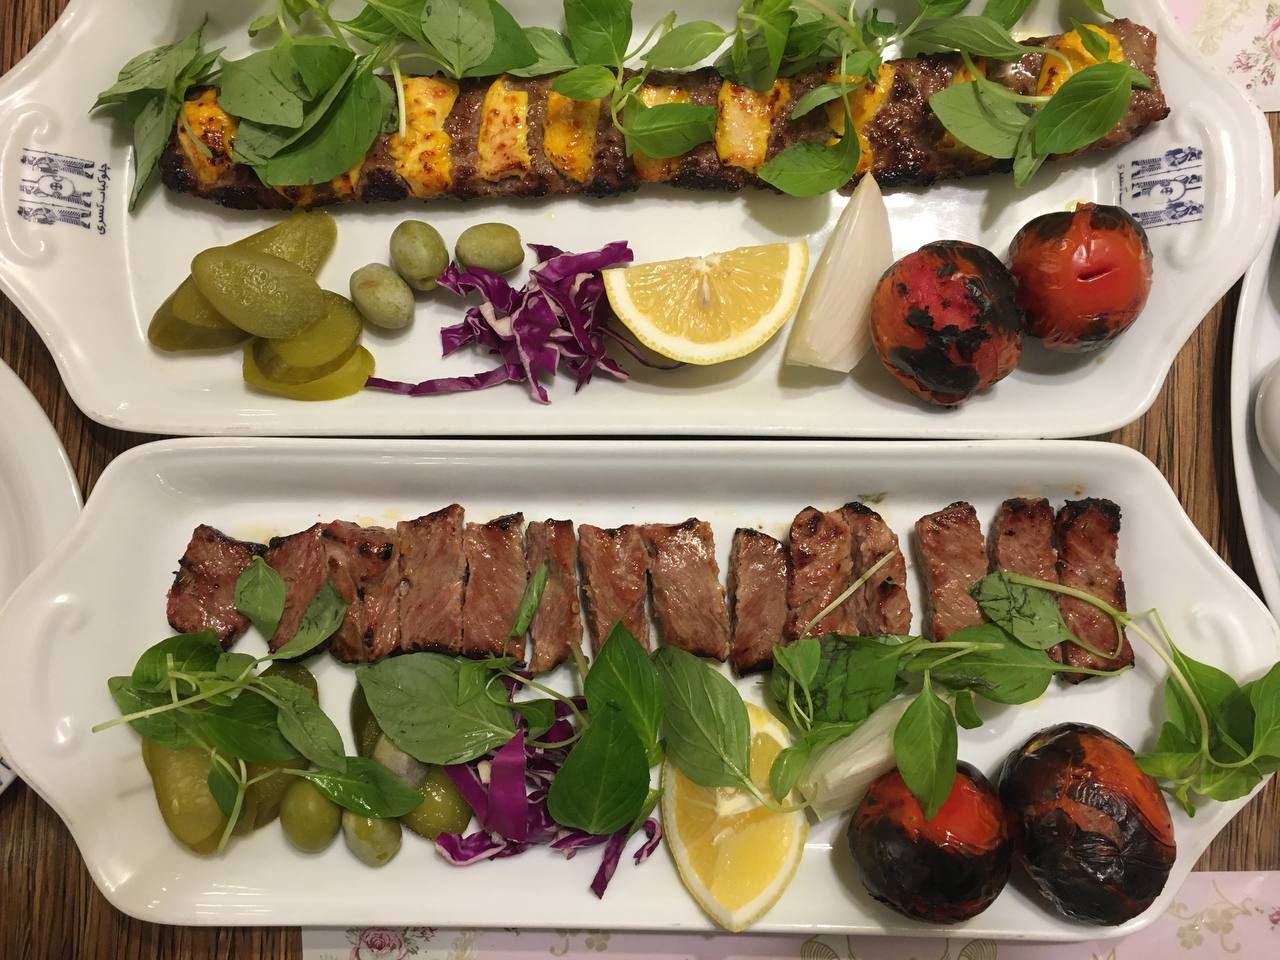

Gray Scale Image:


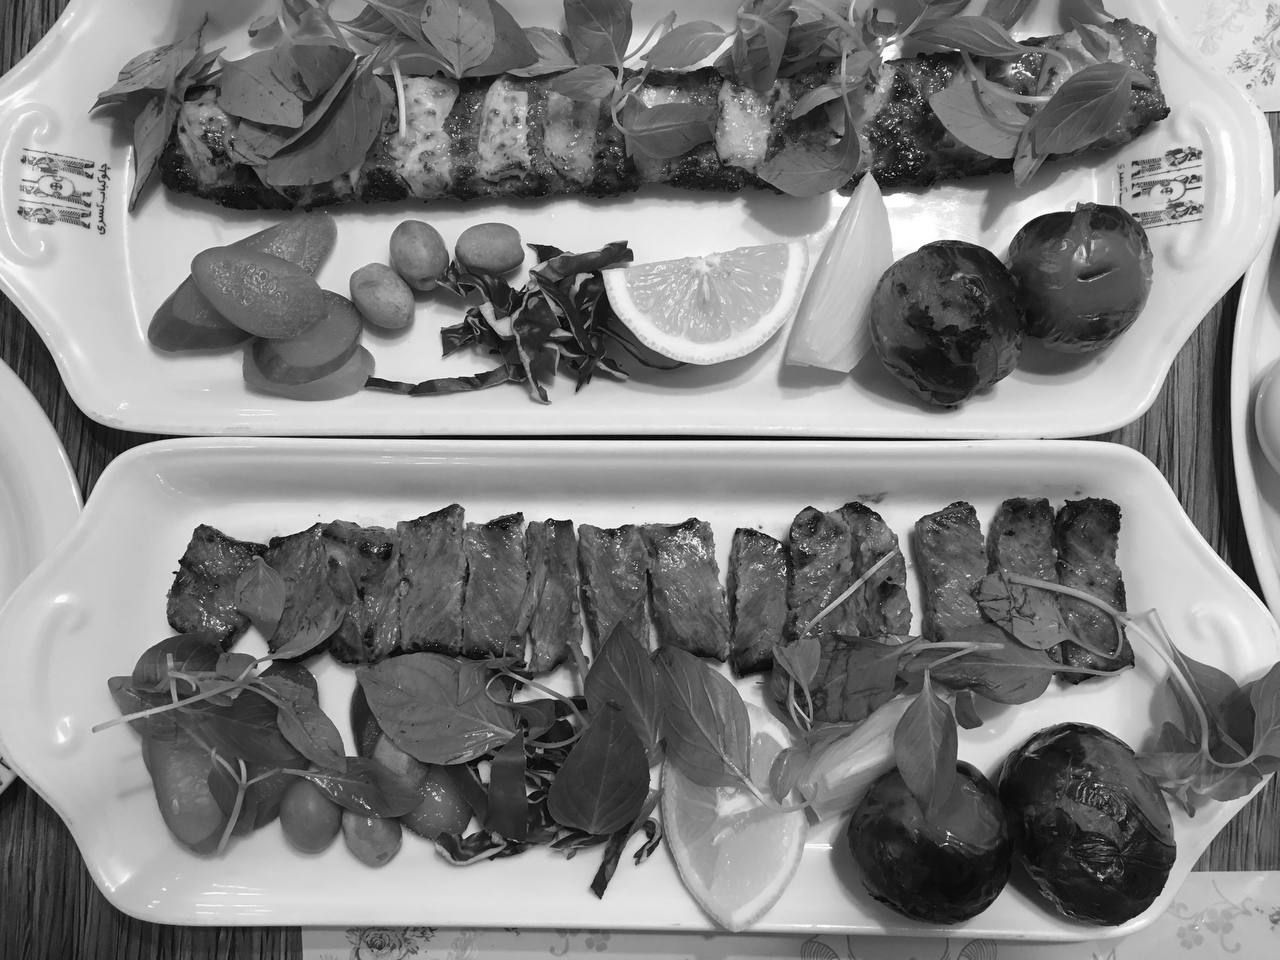

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
threshold=127

def convert_to_gray_scale(image_path):
    original_image = cv2.imread(image_path)
    if original_image is None:
        print("Error: Could not load image from the path")
        return


    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    cv2.imwrite("original.jpg", original_image)
    cv2.imwrite("gray.jpg", gray_image)

    print("Original Image:")
    cv2_imshow(original_image)
    print("Gray Scale Image:")
    cv2_imshow(gray_image)

my_image_path = '/content/1008219287_57058009.jpg'
convert_to_gray_scale(my_image_path)

<div dir="rtl">

##  ۳. رسم هیستوگرام تصویر

-  تابع `show_histogram_of_the_original_image`

  هیستوگرام کانال‌های R، G، B تصویر اصلی را رسم می‌کند.

-  تابع `show_histogram_of_the_gray_scale_image`

  هیستوگرام تصویر خاکستری را رسم می‌کند.

- تابع `show_equalized_gray_histogram`

   تصویر خاکستری را با روش Equalization بهبود می‌دهد.
 هیستوگرام تصویر بهبود یافته را رسم می‌کند.

</div>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_histogram_of_the_original_image(original_img):
  original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title("Original (RGB) Histogram")
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Frequency")

  colors = ('r', 'g', 'b')
  for i, color in enumerate(colors):
      hist = cv2.calcHist([original_rgb], [i], None, [256], [0, 256])
      plt.plot(hist, color=color)
      plt.xlim([0, 256])
  plt.grid(True, alpha=0.3)

def show_histogram_of_the_gray_scale_image(gray_img):
  plt.subplot(1, 2, 2)
  plt.title("Grayscale Histogram")
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Frequency")

  gray_hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
  plt.plot(gray_hist, color='black')
  plt.xlim([0, 256])
  plt.grid(True, alpha=0.3)

  plt.tight_layout()
  plt.show()

def show_equalized_gray_histogram(gray_img):
  equalized_img = cv2.equalizeHist(gray_img)

  plt.figure(figsize=(6, 4))
  plt.title("Equalized Grayscale Histogram")
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Frequency")

  equalized_hist = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])
  plt.plot(equalized_hist, color='gray')
  plt.xlim([0, 256])
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()

#load images
original_img = cv2.imread("original.jpg")
gray_img = cv2.imread("gray.jpg", cv2.IMREAD_GRAYSCALE)

#show histograms
show_histogram_of_the_original_image(original_img)
show_histogram_of_the_gray_scale_image(gray_img)
show_equalized_gray_histogram(gray_img)


<div dir="rtl" style="text-align: right">

# 📈تحلیل هیستوگرام های رسم شده از نظر کنتراست


**هیستوگرام تصویر اصلی (RGB)**

محدوده پیکسل‌ها:
- محور افقی (شدت پیکسل - Pixel Intensity) از ۰ تا ۲۵۵ گسترده شده است.
- هر سه کانال رنگی (قرمز، سبز، آبی) در بازه‌ای وسیع توزیع شده‌اند، اما با تفاوت‌هایی جزئی در فرکانس.

نتیجه‌گیری درباره کنتراست:
- کنتراست متوسط تا بالا:
  پیکسل‌ها در تمام سطوح شدت (از تیره تا روشن) پراکنده‌اند.
  اگر هیستوگرام به‌صورت یکنواخت از چپ به راست امتداد داشت، کنتراست عالی می‌بود، اما در اینجا تمرکز نسبی در ناحیه میانی (حدود ۱۰۰ تا ۱۵۰) دیده می‌شود.

**هیستوگرام تصویر خاکستری (Grayscale)**

محدوده پیکسل‌ها:
- محور افقی از ۰ تا ۲۵۵ گسترده شده است.
- توزیع پیکسل‌ها نسبتاً یکنواخت‌تر از تصویر RGB است، اما همچنان تمرکز در بازه میانی (حدود ۵۰ تا ۲۰۰) دیده می‌شود.

نتیجه‌گیری درباره کنتراست:
- کنتراست متوسط:
  پیکسل‌های بسیار تیره (نزدیک به ۰) و بسیار روشن (نزدیک به ۲۵۵) تعداد کمی دارند.
  بیشتر پیکسل‌ها در ناحیه میانی قرار دارند که نشان‌دهنده کنتراست متعادل است.

مقایسه کلی:
- تصویر RGB از کنتراست بهتری برخوردار است، زیرا پیکسل‌ها در بازه گسترده‌تری توزیع شده‌اند.
- تصویر خاکستری کمی تخت‌تر به نظر می‌رسد و ممکن است برای بهبود کنتراست، نیاز به اعمال تکنیک‌هایی مانندequalization داشته باشد.

</div>


In [ ]:
def analyze_contrast(img, title):
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img

    min_val = np.min(img_gray)
    max_val = np.max(img_gray)
    std_dev = np.std(img_gray)

    print(f"\n{title} Contrast Analysis:")
    print(f"- Min Intensity: {min_val}")
    print(f"- Max Intensity: {max_val}")
    print(f"- Dynamic Range: {max_val - min_val}")
    print(f"- Standard Deviation (Contrast): {std_dev:.2f}")

#analyze contrast of the images
analyze_contrast(original_img, 'Original (RGB)')
analyze_contrast(gray_img, 'Grayscale')


Original (RGB) Contrast Analysis:
- Min Intensity: 1
- Max Intensity: 255
- Dynamic Range: 254
- Standard Deviation (Contrast): 64.84

Grayscale Contrast Analysis:
- Min Intensity: 0
- Max Intensity: 255
- Dynamic Range: 255
- Standard Deviation (Contrast): 64.85


<div dir="rtl">

##  ۴. نمایش طیف فوریه

 تابع `show_fourier_transform`

این تابع وظیفه دارد تبدیل فوریه گسسته (DFT) تصویر خاکستری را محاسبه کرده و طیف بزرگی (Magnitude Spectrum) آن را نمایش دهد.


### مراحل انجام‌شده در این تابع:

1.  تبدیل تصویر به نوع `float32` برای پردازش عددی دقیق‌تر.
2.  استفاده از تابع `cv2.dft` برای محاسبه تبدیل فوریه‌ی دوبعدی.
3.  انتقال مرکز طیف به وسط با `np.fft.fftshift` برای نمایش بهتر.
4.  محاسبه  Magnitude از مؤلفه‌های حقیقی و موهومی طیف.
5.  اعمال تابع لگاریتمی `log1p` برای نمایه‌سازی طیف و افزایش خوانایی مقادیر کوچک.
6.  نمایش طیف با رنگ خاکستری با استفاده از `matplotlib`.

</div>


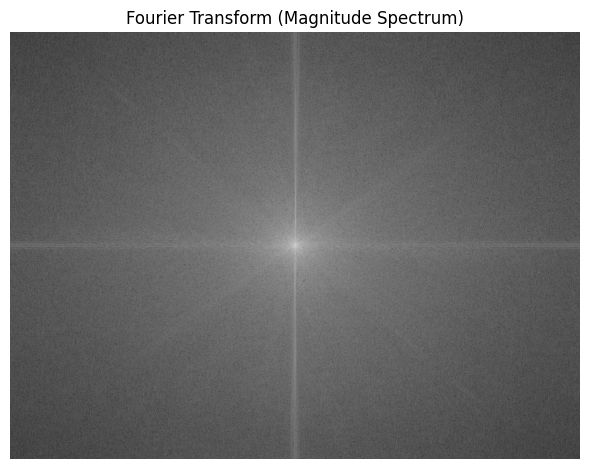

In [ ]:
def show_fourier_transform(gray_img):
    gray_float = np.float32(gray_img)

    dft = cv2.dft(gray_float, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
    magnitude_spectrum = 20 * np.log1p(magnitude)

    plt.figure(figsize=(6, 5))
    plt.title("Fourier Transform (Magnitude Spectrum)")
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

show_fourier_transform(gray_img)